## Question 5 Normalization
## Question 6 Dimensionality Reduction using 


In [80]:
import pandas as pd
import datetime as datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [81]:
y = pd.read_csv('combined.csv')

In [82]:
y.head

<bound method NDFrame.head of               Attributes Adj Close Unnamed: 2   Close Unnamed: 4    High  \
0                Symbols      AAPL       AMZN    AAPL       AMZN    AAPL   
1                   Date       NaN        NaN     NaN        NaN     NaN   
2    2019-01-07 00:00:00   145.003    1629.51  147.93    1629.51  148.83   
3    2019-01-08 00:00:00   147.767    1656.58  150.75    1656.58  151.82   
4    2019-01-09 00:00:00   150.276    1659.42  153.31    1659.42  154.53   
5    2019-01-10 00:00:00   150.757    1656.22   153.8    1656.22  153.97   
6    2019-01-11 00:00:00   149.276    1640.56  152.29    1640.56   153.7   
7    2019-01-14 00:00:00   147.032    1617.21     150    1617.21  151.27   
8    2019-01-15 00:00:00   150.041    1674.56  153.07    1674.56  153.39   
9    2019-01-16 00:00:00   151.874    1683.78  154.94    1683.78  155.88   
10   2019-01-17 00:00:00   152.776    1693.22  155.86    1693.22  157.66   
11   2019-01-18 00:00:00   153.717     1696.2  156.82     

In [83]:
# define instruments to download

companies_dict = {
 'Amazon': 'AMZN',
 'Apple': 'AAPL',
 'IBM': 'IBM',
 'Sony': 'SNE'
 }

companies = sorted(companies_dict.items(), key=lambda x: x[1])
start = datetime.datetime(2019, 1, 6)
end = datetime.datetime(2020,1,1)

#saving it in df

df = web.get_data_yahoo(list(companies_dict.values()),start)


In [84]:
# Find Stock Open and Close Values
stock_close = df['Close']
stock_open = df['Open']

print(stock_close.iloc[0])

Symbols
AAPL     147.929993
AMZN    1629.510010
IBM      118.150002
SNE       49.720001
Name: 2019-01-07 00:00:00, dtype: float64


To calculate the daily stock movements, since it's off of this movement I will cluster data and move on to PCA then.

I converted stock_open and stock_close values to a numpy array.As these are currently a column vector for each day I used .T to take the transpose of these and give row vectors instead.


In [85]:
# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

# create movements dataset filled with 0's
movements = np.zeros([row, col])


#for loop to assign the daily movement (stock_close - stock_open) 
#for all the dates.

for i in range(0, row):
 movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

In [86]:
for i in range(0, len(companies)):
 print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))

Company: Apple, Change: 203.79998779296875
Company: Amazon, Change: 567.4598388671875
Company: IBM, Change: 19.420166015625
Company: Sony, Change: -1.0200080871582031


### 2. Exploratory Data Analysis (EDA)

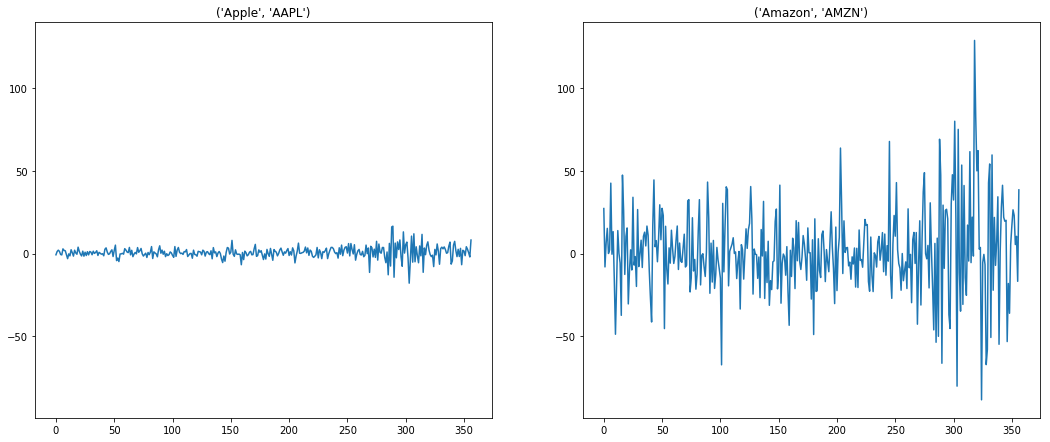

In [87]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [88]:
print(df.columns)

MultiIndex(levels=[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], ['AAPL', 'AMZN', 'IBM', 'SNE']],
           codes=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]],
           names=['Attributes', 'Symbols'])


In [89]:
#Cleaning 
print(df.isnull().sum())
# Drop missing value
df.fillna(value=-99999, inplace=True)



Attributes  Symbols
Adj Close   AAPL       0
            AMZN       0
            IBM        0
            SNE        0
Close       AAPL       0
            AMZN       0
            IBM        0
            SNE        0
High        AAPL       0
            AMZN       0
            IBM        0
            SNE        0
Low         AAPL       0
            AMZN       0
            IBM        0
            SNE        0
Open        AAPL       0
            AMZN       0
            IBM        0
            SNE        0
Volume      AAPL       0
            AMZN       0
            IBM        0
            SNE        0
dtype: int64


# Normalizing  

In [90]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.3082122678663016
-0.32961590665128393
0.0032432759600199844


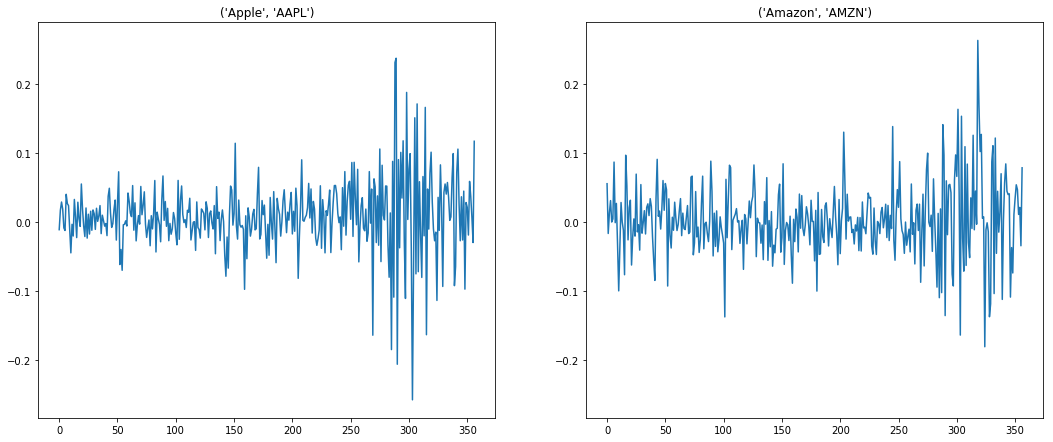

In [91]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(new[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(new[1][:])
plt.title(companies[1])
plt.show()

Normalizer() from sklearn.preprocessing, and then for calculating the new minimum movement value, the maximum, and the mean.

There's much more even movements after normalizing the data.

### Additional steps to move to Data Reduction

In [92]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# define normalizer
normalizer = Normalizer()

# create a K-means model with 10 clusters
kmeans = KMeans(n_clusters=3, max_iter=1000)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

In [93]:
# fit pipeline to daily stock movements
pipeline.fit(movements)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [94]:
# predict cluster labels
labels = pipeline.predict(movements)

# create a DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# display df sorted by cluster labels
print(df.sort_values('labels'))

   labels       companies
3       0     (Sony, SNE)
0       1   (Apple, AAPL)
1       1  (Amazon, AMZN)
2       2      (IBM, IBM)


## Principle Component Analysis


Its linear dimensionality reduction using singular value decomposition of the data.

It is used to a lower dimensional space so that it can graphically represent the different clusters.


The number of components  is 2 ,to plot it on 2-dimensional graph.

passed in new to fit_transform(), which is the normalized data from earlier.

In [95]:
# PCA
from sklearn.decomposition import PCA 

# visualize the results
reduced_data = PCA(n_components = 2).fit_transform(new)

# run kmeans on reduced data
kmeans = KMeans(n_clusters=3)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labels
print(df.sort_values('labels'))

   labels       companies
0       0   (Apple, AAPL)
1       0  (Amazon, AMZN)
3       1     (Sony, SNE)
2       2      (IBM, IBM)


## Visualization of PCA

<Figure size 432x288 with 0 Axes>

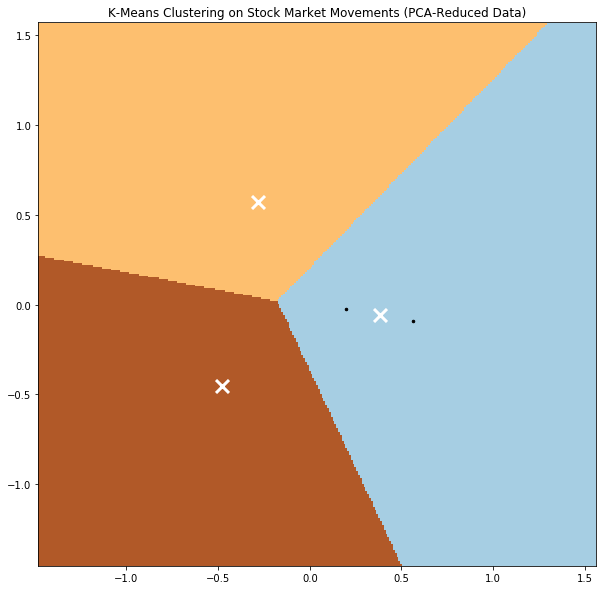

In [96]:
# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()


3 clusters and the centers of each cluster are plotted with a white X.